In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
import joblib

import numpy as np 

In [113]:
df = pd.read_csv("data/data_cleaned.csv")


In [114]:
df


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,IsZeroFloorReported,IsAggregatedCampus,extreme_zscore_count,exclusion_reason,IsMixedUse,Has_EnergyStarScore
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,Compliant,NaN,249.98,2.83,0,0,0,NaN,0,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,Compliant,NaN,295.86,2.86,0,0,0,NaN,1,1
2,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,Compliant,NaN,286.43,4.67,0,0,0,NaN,0,1
3,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,Compliant,NaN,505.01,2.88,0,0,0,NaN,1,1
4,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,Compliant,NaN,301.81,3.10,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,98116.0,2524039059,...,Compliant,NaN,20.33,1.11,0,0,0,NaN,0,0
1411,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,98116.0,3558300000,...,Compliant,NaN,32.17,2.01,0,0,0,NaN,0,0
1412,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,98116.0,1794501150,...,Compliant,NaN,223.54,16.99,0,0,0,NaN,1,0
1413,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,98109.0,7883603155,...,Compliant,NaN,22.11,1.57,0,0,0,NaN,1,0


In [115]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                3
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType        642
SecondLargestPropertyUseTypeGFA       0


In [117]:
df.dropna(axis=1,inplace=True)

In [118]:
df.isna().sum()

OSEBuildingID                      0
DataYear                           0
BuildingType                       0
PrimaryPropertyType                0
PropertyName                       0
Address                            0
City                               0
State                              0
ZipCode                            0
TaxParcelIdentificationNumber      0
CouncilDistrictCode                0
Neighborhood                       0
Latitude                           0
Longitude                          0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
ListOfAllPropertyUseTypes          0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUI(kBtu/sf)                   0
SiteEUIWN(kBtu/sf)                 0
S

In [119]:


# Colonnes numériques
num_features = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
   'ENERGYSTARScore',
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
    'NaturalGas(therms)', 'NaturalGas(kBtu)', 'extreme_zscore_count'
]


X = df[num_features].copy()
y = df['TotalGHGEmissions'].copy()




In [129]:
X

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),extreme_zscore_count
0,1927,1.0,12,88434,0,88434,88434.0,26258.5,4500.0,60.0,...,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,0
1,1996,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,...,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,0
2,1926,1.0,10,61320,0,61320,61320.0,26258.5,4500.0,56.0,...,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,0
3,1980,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,...,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,0
4,1999,1.0,2,97288,37198,60090,88830.0,7395.0,2110.0,60.0,...,316.299988,320.500000,1.208662e+07,1.258171e+07,0.00,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,1982,1.0,1,18261,0,18261,18261.0,7395.0,2110.0,60.0,...,126.000000,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,0
1411,2004,1.0,1,16000,0,16000,16000.0,7395.0,2110.0,60.0,...,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,0
1412,1974,1.0,1,13157,0,13157,7583.0,5574.0,0.0,60.0,...,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,0
1413,1989,1.0,1,14101,0,14101,6601.0,6501.0,484.0,63.0,...,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,0


In [130]:
y

0       249.98
1       295.86
2       286.43
3       505.01
4       301.81
         ...  
1410     20.33
1411     32.17
1412    223.54
1413     22.11
1414     41.27
Name: TotalGHGEmissions, Length: 1415, dtype: float64

In [131]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
X_test

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),extreme_zscore_count
812,1974,1.0,3,39927,0,39927,39541.0,0.0,3642.0,38.0,...,283.399994,304.299988,3568419.50,3.832168e+06,0.000000e+00,1.045844e+06,3.568419e+06,0.000000,0.000,0
916,1959,1.0,3,25151,0,25151,24155.0,9168.5,3642.0,85.0,...,116.300003,122.500000,1356874.75,1.481689e+06,7.489847e+05,1.781624e+05,6.078900e+05,0.000000,0.000,0
339,1973,0.0,1,110689,0,110689,110689.0,7395.0,2110.0,60.0,...,28.900000,33.200001,2339814.25,2.789899e+06,0.000000e+00,1.044338e+05,3.563280e+05,19834.861330,1983486.000,0
192,1930,1.0,21,305548,0,305548,310000.0,26258.5,4500.0,58.0,...,220.600006,222.199997,33729336.00,3.452736e+07,1.628457e+07,4.272584e+06,1.457806e+07,28667.048830,2866705.000,0
203,1929,1.0,15,151039,0,151039,125473.0,69850.5,9835.0,84.0,...,92.300003,92.300003,5446624.00,5.446624e+06,2.850078e+06,7.610041e+05,2.596546e+06,0.000000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1962,0.0,1,29000,0,29000,25100.0,7395.0,2110.0,60.0,...,235.199997,245.899994,2429214.00,2.642232e+06,0.000000e+00,4.703133e+05,1.604709e+06,8245.049805,824505.000,0
1407,1972,1.0,1,12769,0,12769,10912.0,1670.0,187.0,60.0,...,618.099976,638.900024,5117308.50,5.370264e+06,0.000000e+00,3.532161e+05,1.205173e+06,39121.351560,3912135.156,0
188,1973,1.0,1,52500,0,52500,49395.0,5853.0,4865.0,2.0,...,191.800003,196.600006,3989399.00,4.243867e+06,0.000000e+00,8.982349e+05,3.064777e+06,9246.209961,924621.000,0
310,1980,1.0,1,58480,0,58480,44431.0,0.0,0.0,37.0,...,581.900024,588.000000,11054535.00,1.131143e+07,0.000000e+00,1.998174e+06,6.817771e+06,42367.628910,4236763.000,0


In [136]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:

y_pred = rf.predict(X_test)

RMSE: 36207.62
R² Score: 0.84


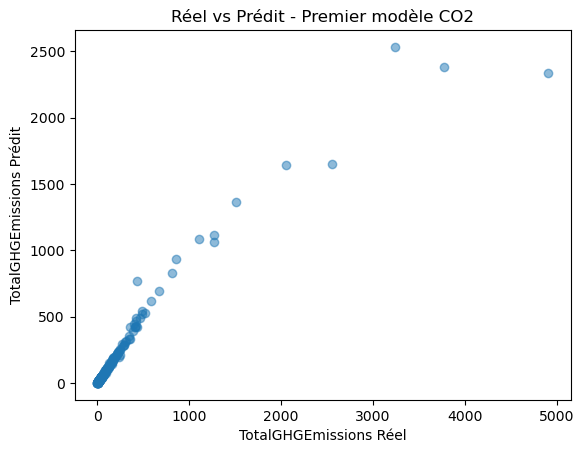

In [138]:

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("TotalGHGEmissions Réel")
plt.ylabel("TotalGHGEmissions Prédit")
plt.title("Réel vs Prédit - Premier modèle CO2")
plt.show()

In [141]:

# Créer le dossier models s'il n'existe pas
Path("models").mkdir(exist_ok=True)

# Sauvegarde du modèle
joblib.dump(rf, "models/co2_model.joblib")

['models/co2_model.joblib']

In [144]:
X.columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'extreme_zscore_count'],
      dtype='object')